In [1]:
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tadasets
from sklearn.cluster import AgglomerativeClustering

In [2]:
np.random.seed(9)
x = tadasets.dsphere(n=500, d=1, noise=0.03)

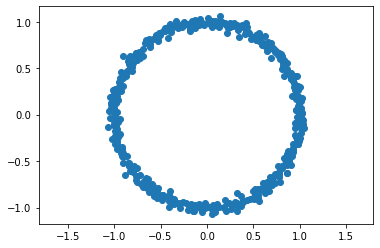

In [3]:
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()

In [4]:
mapper = km.KeplerMapper(verbose=2)

lens2 = mapper.fit_transform(x, projection="x[1]")

lens1 = mapper.fit_transform(x, projection="l2norm")

lens = np.c_[lens1, lens2]

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: x[1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (500, 2)

..Projecting data using: x[1]

..Scaling with: MinMaxScaler()

..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (500, 2)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()



In [5]:
graph = mapper.map(
    x,
    clusterer=sklearn.cluster.DBSCAN(metric="euclidean"),
    cover=km.Cover(n_cubes=3, perc_overlap=0.4),
)

informacion = mapper.data_from_cluster_id('cube2_cluster0', graph, x)

print(informacion)

Mapping on data shaped (500, 2) using lens shaped (500, 2)

Minimal points in hypercube before clustering: 5
Creating 9 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.

Created 8 edges and 8 nodes in 0:00:00.036060.
[[-0.5805273   0.81795145]
 [-0.75034844  0.6317527 ]
 [-0.6265692   0.77644024]
 [-1.00635892  0.16272632]
 [-0.9674865   0.26367567]
 [-0.29068598  0.95734138]
 [-0.90884167  0.31350818]
 [-0.17816547  0.90016066]
 [-0.82112812  0.61791037]
 [-0.65175478  0.80801876]
 [-0.39912763  0.89954129]
 [-0.12991954  0.93757651]
 [-0.5228868   0.79027281]
 [-1.03755811  0.12333395]
 [-1.00923003  0.26013501]
 [-0.99229355  0.23546456]
 [-0.76873656  0.65870109]
 [-0.82750319  0.51733497]
 [-0.81580898  0.56346691]
 [-

Wrote visualization to: circulomapper.html
no display found. Using non-interactive Agg backend


/var/folders/j_/kb3fq6hn5m1bfxm6rj3k2ng40000gn/T/ipykernel_1767/50421312.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


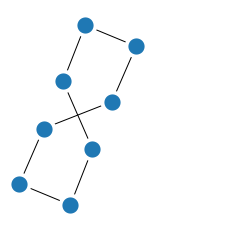

In [6]:
mapper.visualize(
    graph,
    path_html="circulomapper.html",
    title="Circulo Mapper",
    color_values=lens,
    colorscale=None,
    nbins=8,
    color_function_name=['Proyeccion en el eje x', 'Norma L2', 'kjkj'],
    node_color_function=['mean', 'std', 'median', 'max']
)

km.draw_matplotlib(graph)

import matplotlib.pyplot as plt

plt.show()